In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loan = pd.read_csv("Final_loan_amount.csv", index_col='Unnamed: 0')
loan = loan[loan.max_country != 'united states']
loan = loan[loan.max_country != 'None']

In [3]:
# Returns the dataframe back only with countries that have more than 50 loans
most_loan = loan.loc[loan['max_country'].map(loan.max_country.value_counts())>50]
loan.loc[loan['max_country'].map(loan.max_country.value_counts())>50].max_country.value_counts()

# A list of all of the countries who have over 50 loans
countries = most_loan.max_country.value_counts().index

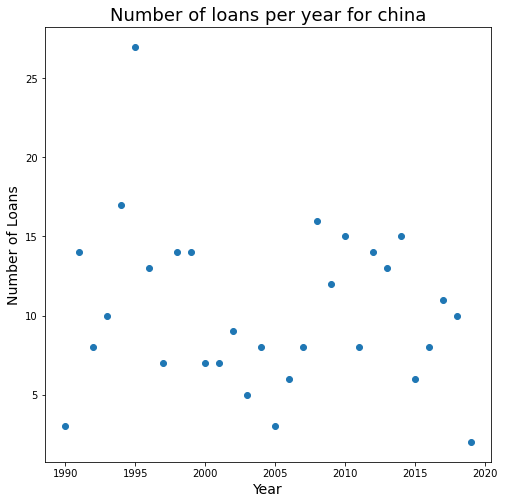

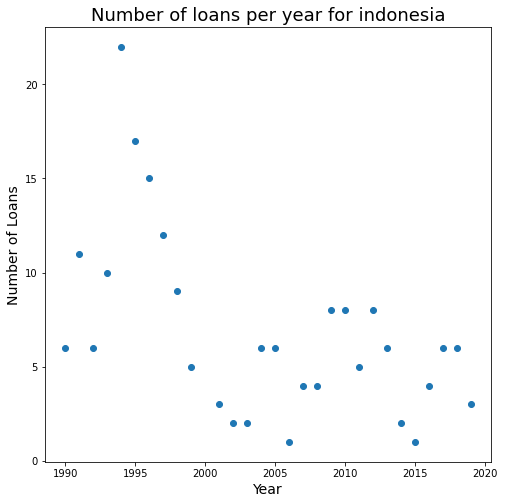

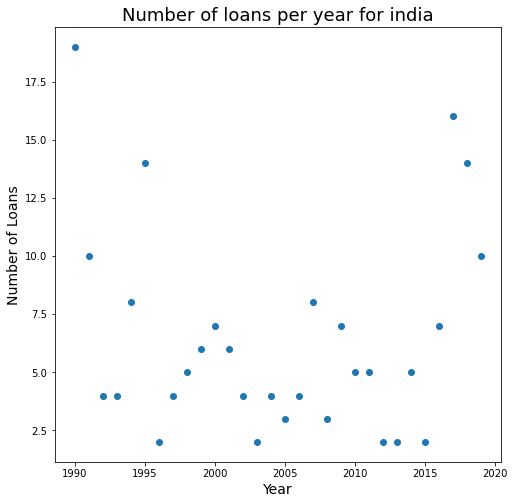

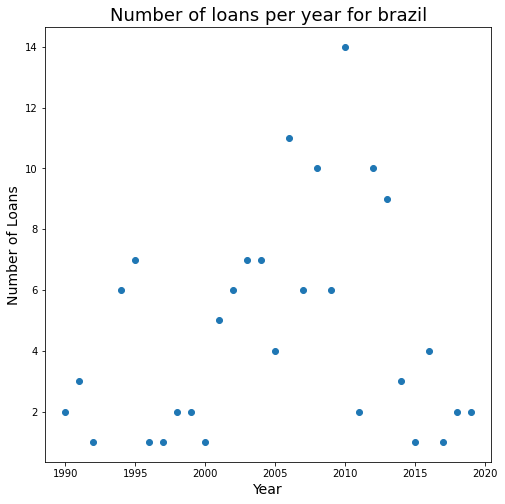

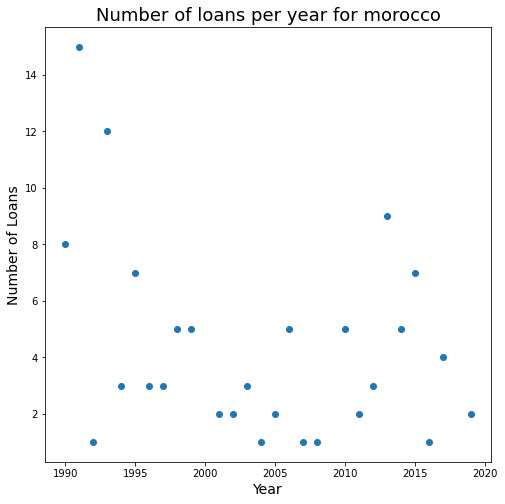

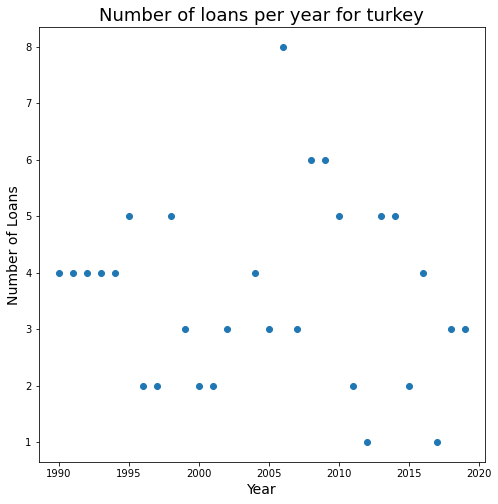

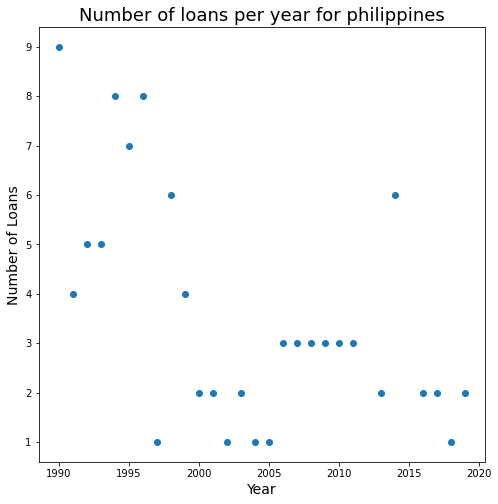

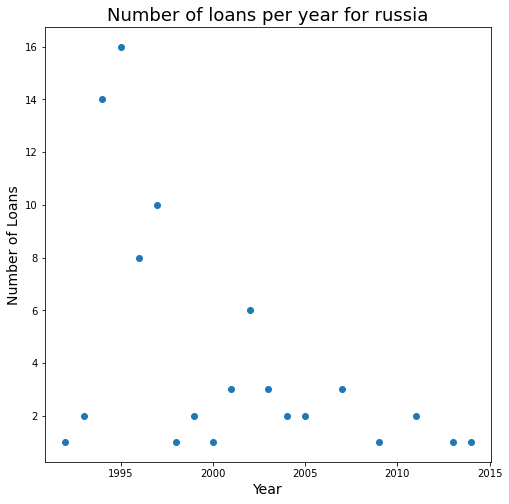

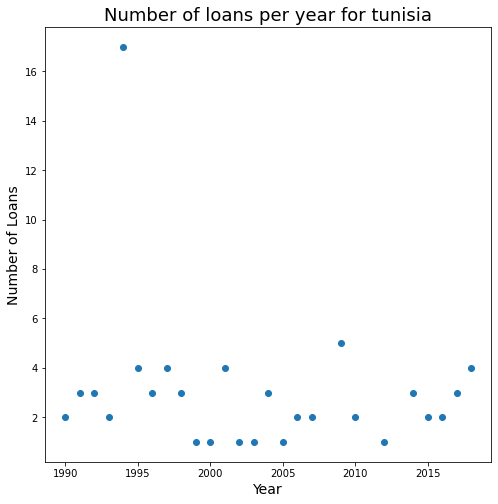

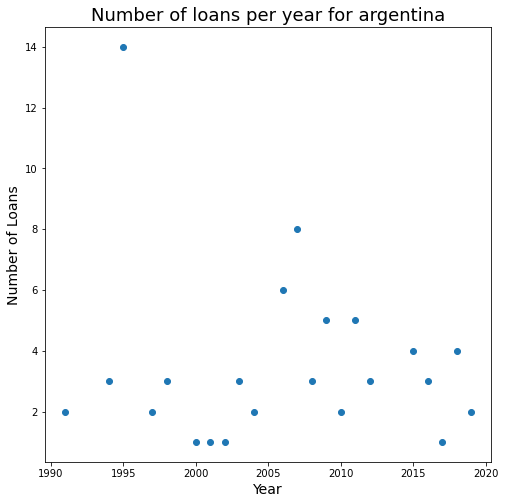

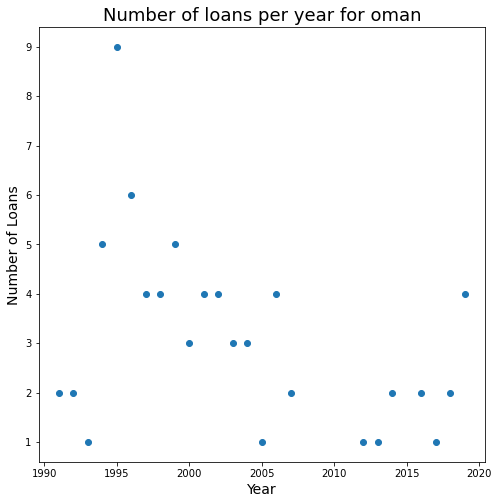

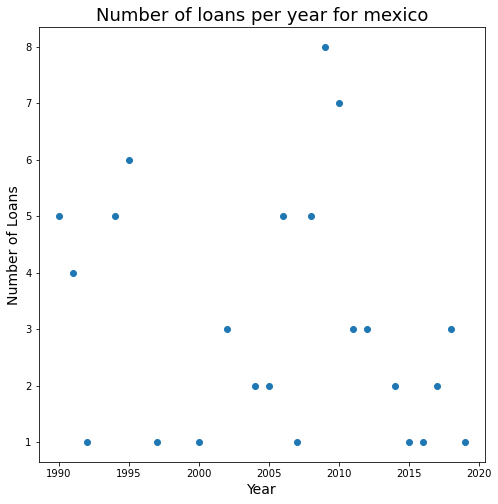

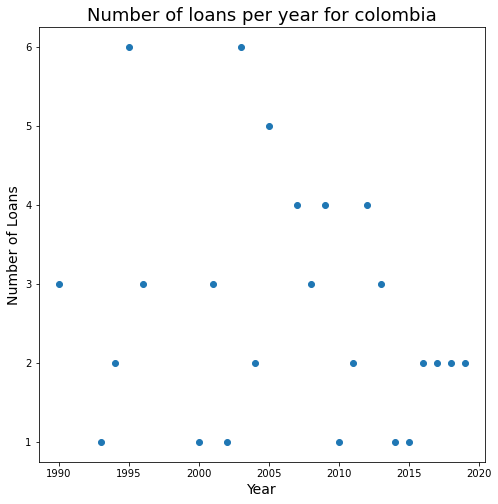

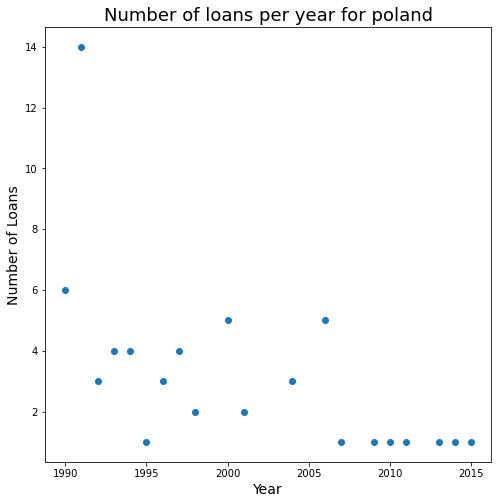

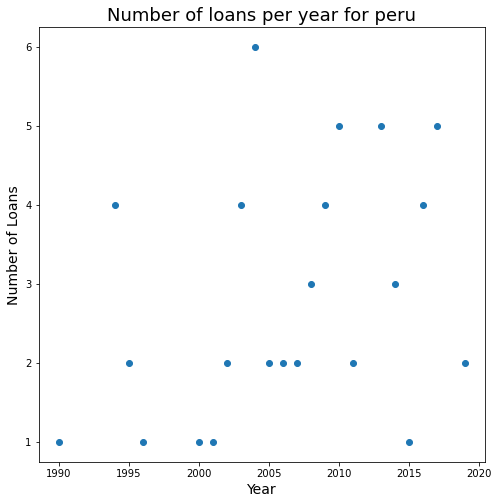

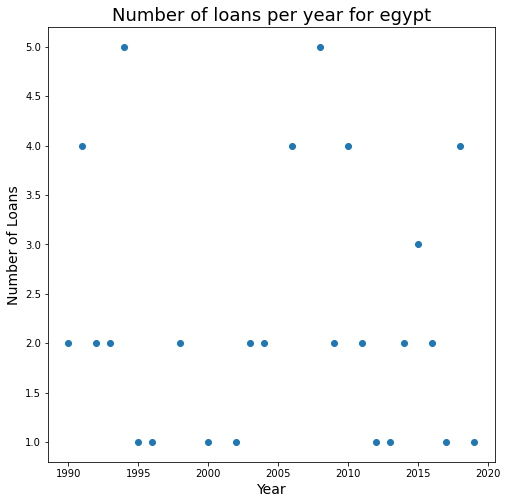

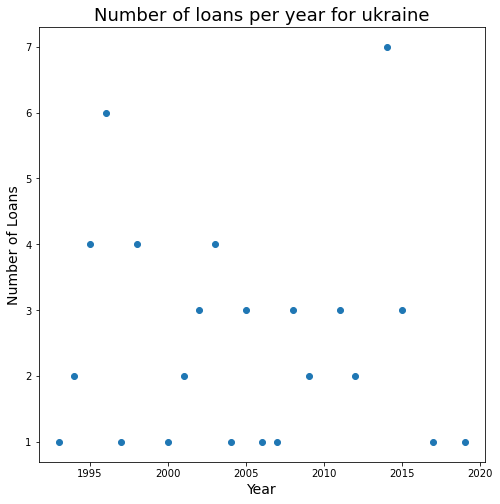

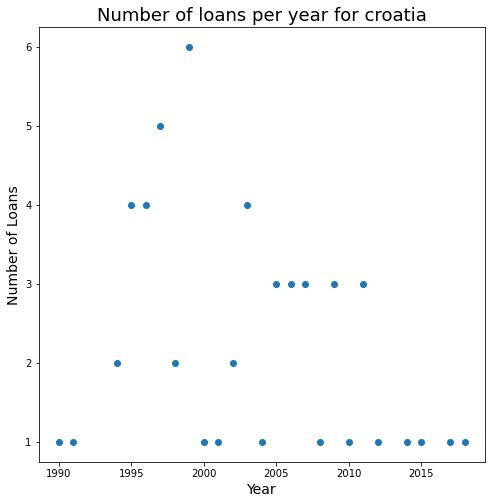

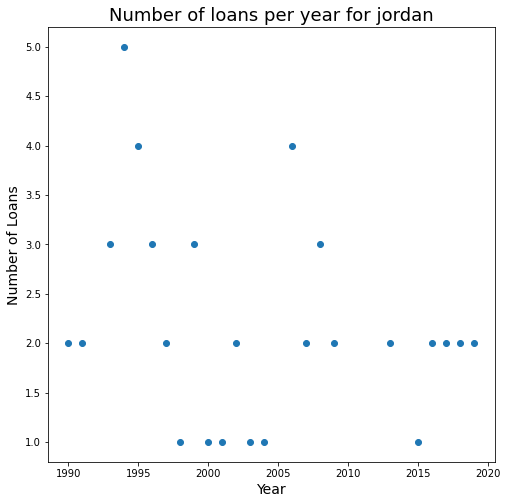

In [4]:
# Examines the number of loans over time

i=0
for country in countries:
    plt.figure(figsize=(8,8))
    
    loan_per_yr = most_loan[most_loan.max_country == country].year.value_counts().sort_index()
    
    plt.scatter(loan_per_yr.index, loan_per_yr.values)
    plt.title("Number of loans per year for " + country, fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Loans', fontsize=14)
    
    plt.show()

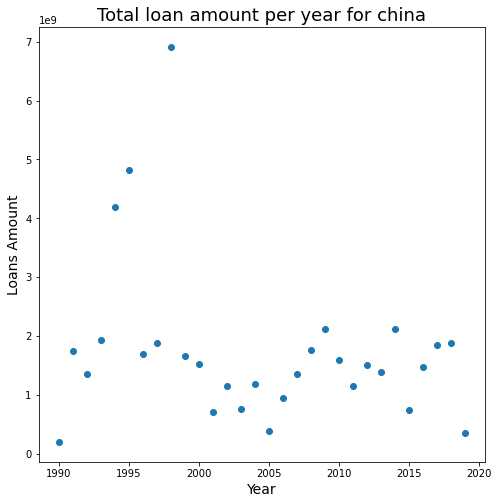

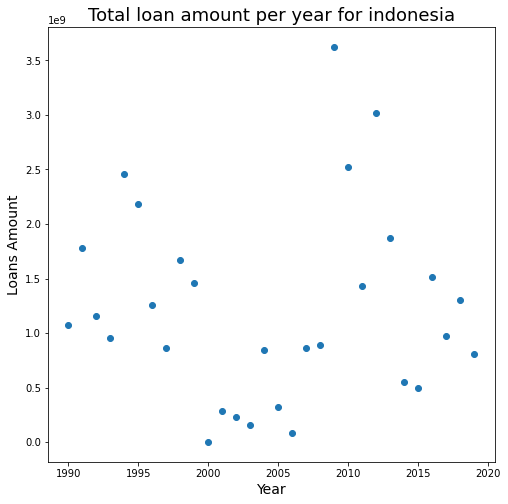

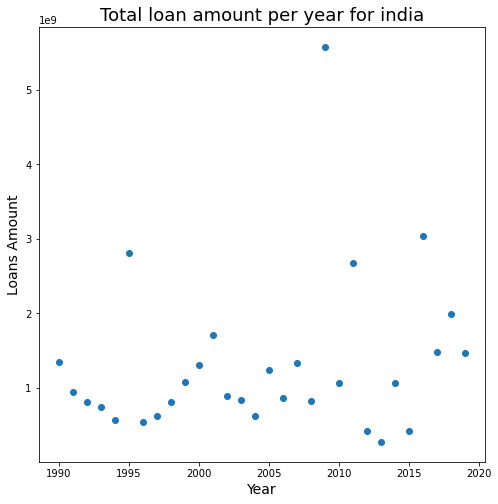

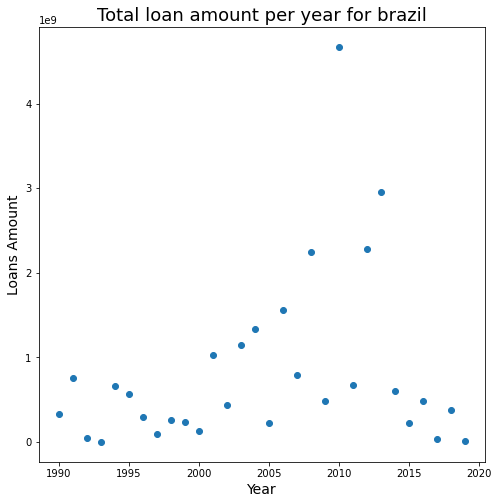

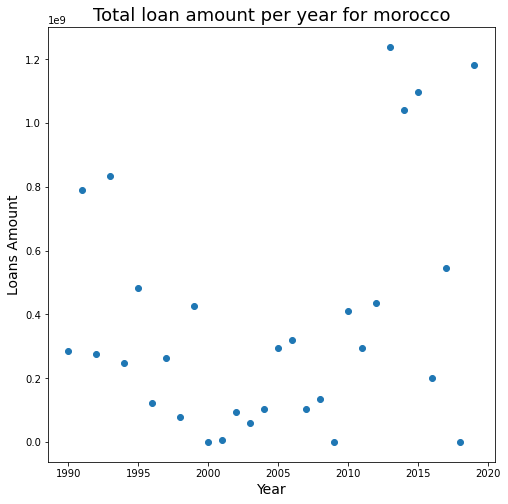

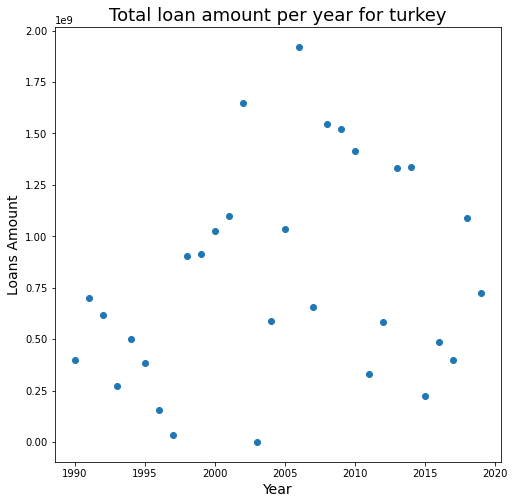

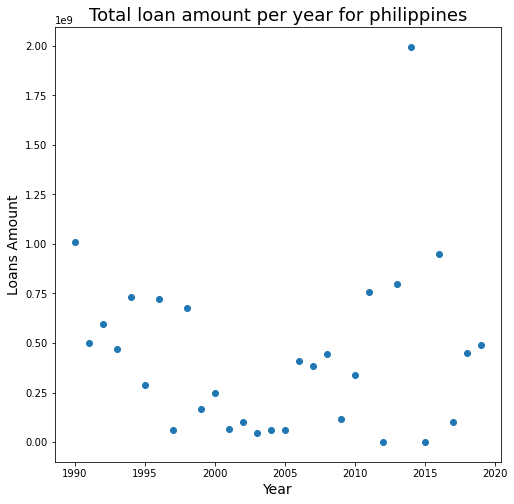

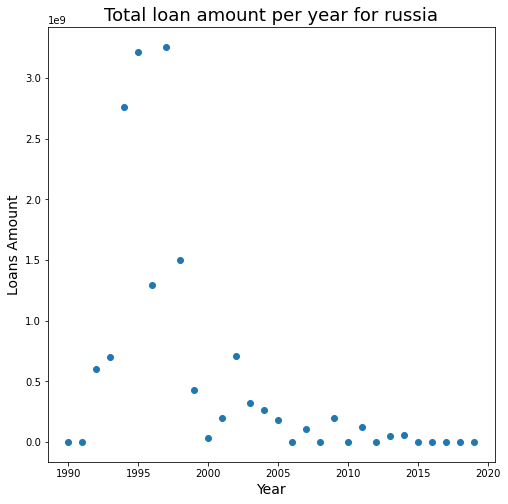

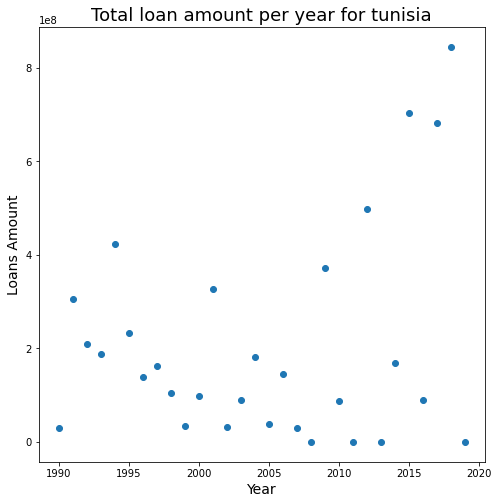

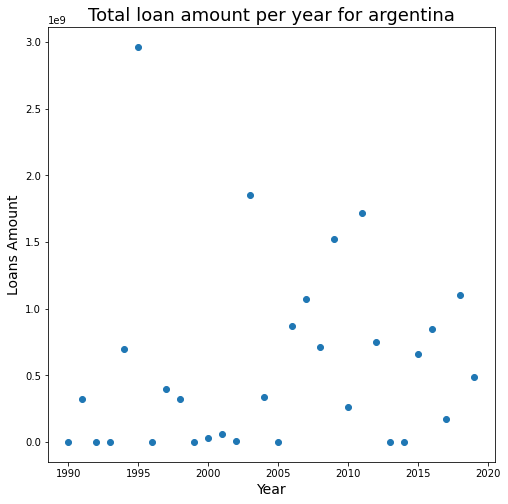

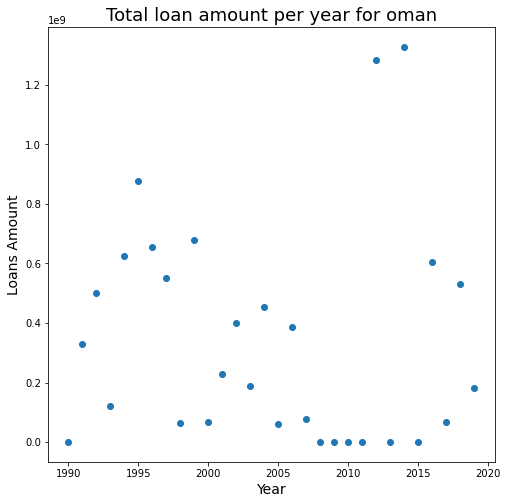

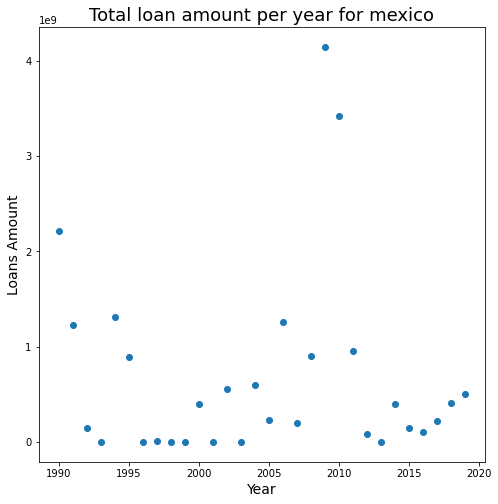

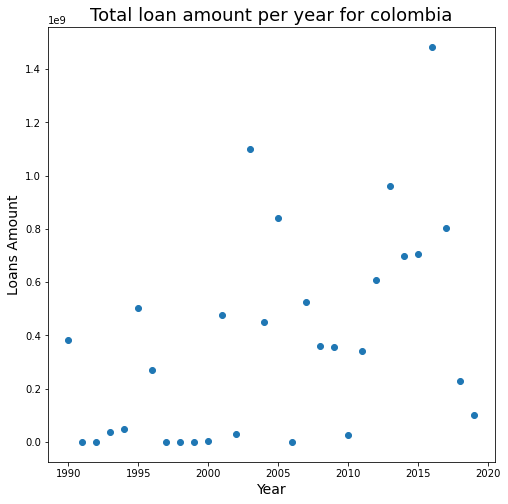

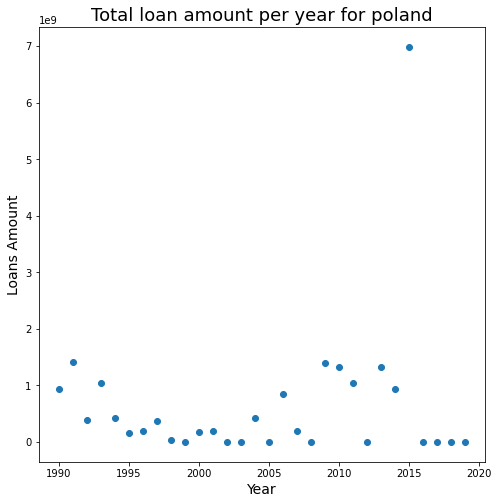

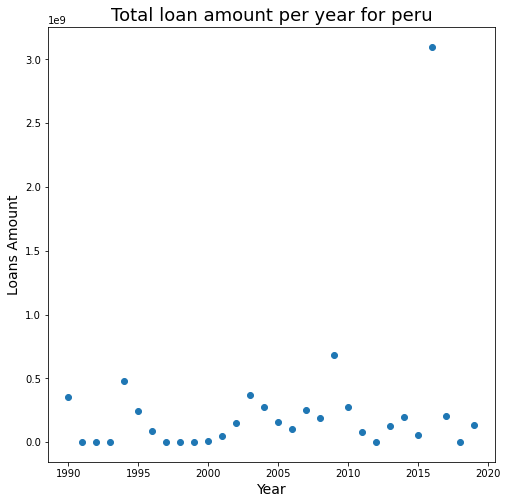

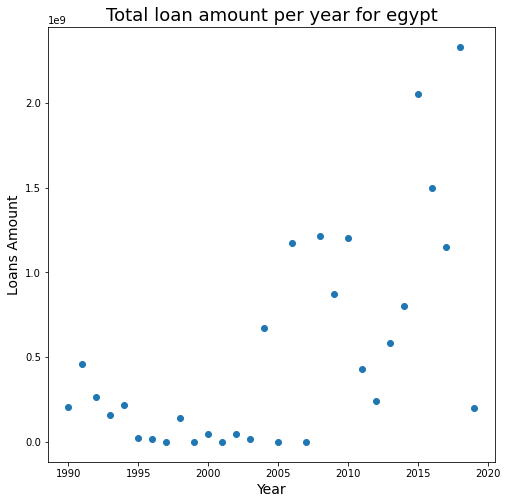

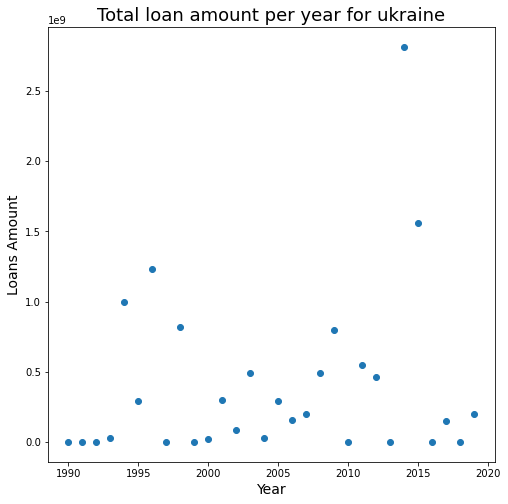

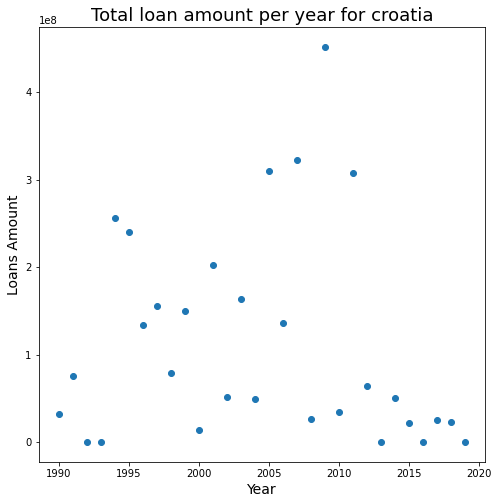

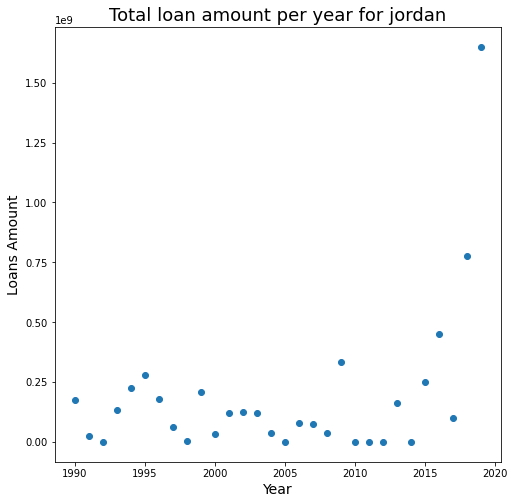

In [5]:
# Examines the total loan amount over time

total_amt = np.zeros(len(range(1990,2020)))

for country in countries:
    for yr in range(1990,2020):
        total_amt[yr-1990] = most_loan[(most_loan.max_country == country) & (most_loan.year == yr)].loan_amount.sum()
    
    plt.figure(figsize=(8,8))
    
    plt.scatter(range(1990,2020), total_amt)
    plt.title("Total loan amount per year for " + country, fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Loans Amount', fontsize=14)
    
    plt.show()

In [7]:
govern = pd.read_csv('wgidataset.csv', encoding='latin-1')

In [8]:
len(loan[(loan.max_country == country) & (loan.year == 1996)].year.value_counts().sort_index().values)

1

In [9]:
all_countries = loan.max_country.value_counts().index

df = pd.DataFrame(columns=['country', 'stability', 'year'])



# for country in all_countries:
#     try:
#         govern.loc[country.capitalize()]['1996']
        
#         loan[(loan.max_country == country) & (loan.year == 1996)].year.value_counts().sort_index().values[0]
# #         np.append(loan_data, temp, axis=0)
#     except:
#         print('Country not found for 1996: ', country)

In [10]:
df

,country,stability,year


In [11]:
most_loan[most_loan.max_country == country].year.value_counts().sort_index().values[0]

2

In [12]:
country_dict = {"venezuela, rb": "venezuela",
                "slovak republic": "slovakia", "syrian arab republic": "syria", "russian federation": "russia",
               "iran, islamic rep.": "iran", "egypt, arab rep.": "egypt", "north macedonia": "macedonia",
               "St. Lucia": "saint lucia", "Lao PDR": "laos", "Eswatini": "swaziland", "Côte d'Ivoire": "cote d'ivoire"}

country_dict_GDP = {"Venezuela, RB": "venezuela",
                "Slovak Republic": "slovakia", "Syrian Arab Republic": "Syria", "Russian Federation": "russia",
               "Iran, Islamic Rep.": "iran", "Egypt, Arab Rep.": "egypt", "North Macedonia": "macedonia",
               "st. lucia": "saint lucia", "lao pdr": "laos", "eswatini": "swaziland", "cote d'ivoire": "cote d'ivoire"}

In [13]:
country_dict

{'venezuela, rb': 'venezuela',
 'slovak republic': 'slovakia',
 'syrian arab republic': 'syria',
 'russian federation': 'russia',
 'iran, islamic rep.': 'iran',
 'egypt, arab rep.': 'egypt',
 'north macedonia': 'macedonia',
 'St. Lucia': 'saint lucia',
 'Lao PDR': 'laos',
 'Eswatini': 'swaziland',
 "Côte d'Ivoire": "cote d'ivoire"}

In [14]:
Pol_df = pd.read_csv("wgidataset.csv", encoding='latin-1')
GDP_df = pd.read_csv("Country GDP.csv")
Pol_df = Pol_df.set_index('Country')
GDP_df = GDP_df.set_index('Country')

#Convert dataframes from wide to long
Pol_df = Pol_df.unstack().swaplevel().to_frame().reset_index()
Pol_df.columns = ['Country', 'Year', 'Stability']
Pol_df['Country'] = Pol_df['Country'].str.lower()

GDP_df = GDP_df.unstack().swaplevel().to_frame().reset_index()
GDP_df.columns = ['Country', 'Year', 'GDP']
GDP_df['Country'] = GDP_df['Country'].str.lower()

In [15]:
Pol_df

,Country,Year,Stability
0,andorra,1996,1.17
1,afghanistan,1996,-2.41
2,angola,1996,-2.06
3,albania,1996,-0.33
4,united arab emirates,1996,0.96
...,...,...,...
4153,serbia,2020,-0.09
4154,south africa,2020,-0.24
4155,"congo, dem. rep.",2020,-1.71
4156,zambia,2020,-0.13


In [16]:
GDP_df

,Country,Year,GDP
0,aruba,1990,7.648871e+08
1,africa eastern and southern,1990,2.130000e+11
2,afghanistan,1990,NaN
3,africa western and central,1990,1.220000e+11
4,angola,1990,1.123628e+10
...,...,...,...
8241,kosovo,2020,7.611402e+09
8242,"yemen, rep.",2020,NaN
8243,south africa,2020,3.020000e+11
8244,zambia,2020,1.932005e+10


In [ ]:
Pol_df.to_csv('Stability.csv')
GDP_df.to_csv('GDP.csv')

In [17]:
# # Only use to process later
# Pol_df = pd.read_csv("Stability.csv", encoding='latin-1')
# GDP_df = pd.read_csv("GDP.csv")

In [7]:
loan.columns

Index(['year', 'loan_amount', 'max_country', 'world_region'], dtype='object')

In [18]:
loan = loan.rename(columns={'max_country': 'Country', 'year': 'Year'})

In [19]:
final_df = pd.merge(loan, GDP_df, on=['Country', 'Year'], how='left')
final_df = pd.merge(final_df, Pol_df, on=['Country', 'Year'], how='left')

In [21]:
final_df

,Year,loan_amount,Country,world_region,GDP,Stability
0,1990,1.800000e+07,poland,eastern europe,6.597775e+10,NaN
1,1990,3.290000e+08,indonesia,asia (ex. near east),1.060000e+11,NaN
2,1990,3.500000e+08,peru,latin amer. & carib,2.641039e+10,NaN
3,1990,1.100000e+08,algeria,northern africa,6.204856e+10,NaN
4,1990,2.500000e+07,india,asia (ex. near east),3.210000e+11,NaN
...,...,...,...,...,...,...
2870,2019,4.000000e+08,india,asia (ex. near east),2.870000e+12,-0.77
2871,2019,1.399343e+08,macedonia,eastern europe,1.254709e+10,0.00
2872,2019,2.500000e+06,colombia,latin amer. & carib,3.230000e+11,-0.95
2873,2019,2.798686e+07,oman,near east,7.633152e+10,0.59


In [119]:
final_df.to_csv('Merged_data.csv')